In [14]:
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [64]:
import os
import requests
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

import itertools
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [65]:
data = pd.read_csv("data/ciel3.csv", sep=',')

In [66]:
data.tail()

,Date,Close
1365,7/15/2019,7.04
1366,7/16/2019,7.01
1367,7/17/2019,6.95
1368,7/18/2019,6.70
1369,7/19/2019,6.68


In [67]:
data.columns = ['date', 'close']
data.date = pd.to_datetime(data.date, format='%m/%d/%Y', errors='coerce')
data.temperature = pd.to_numeric(data.close, errors='coerce')
data['date_trunc'] = data['date'].apply(lambda s: datetime.date(s.year, s.month, s.day))
data = data.dropna()

In [68]:
data = data.set_index('date')

In [69]:
data.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2019-07-05', '2019-07-08', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19'],
              dtype='datetime64[ns]', name='date', length=1370, freq=None)

In [109]:
y = data['close'].resample('D').mean().dropna()

In [110]:
y.head()

date
2014-01-02    19.13
2014-01-03    19.37
2014-01-06    19.40
2014-01-07    19.62
2014-01-08    19.65
Name: close, dtype: float64

In [111]:
y['2018':].head()

date
2018-01-02    24.09
2018-01-03    24.43
2018-01-04    24.45
2018-01-05    24.73
2018-01-08    25.00
Name: close, dtype: float64

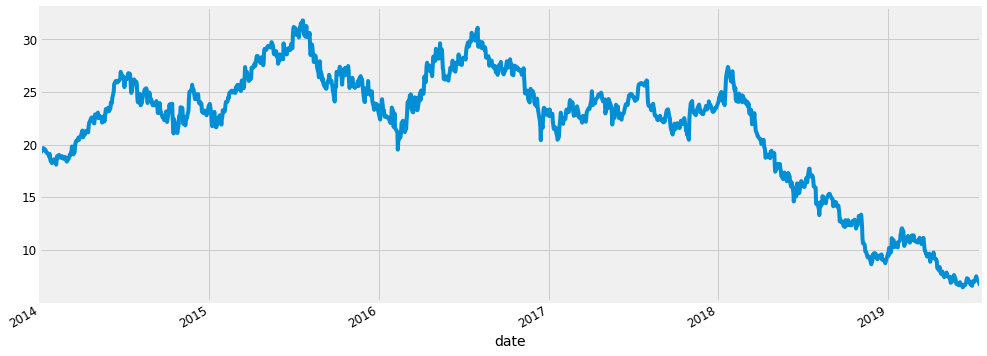

In [112]:
y.plot(figsize=(15, 6))
plt.show()

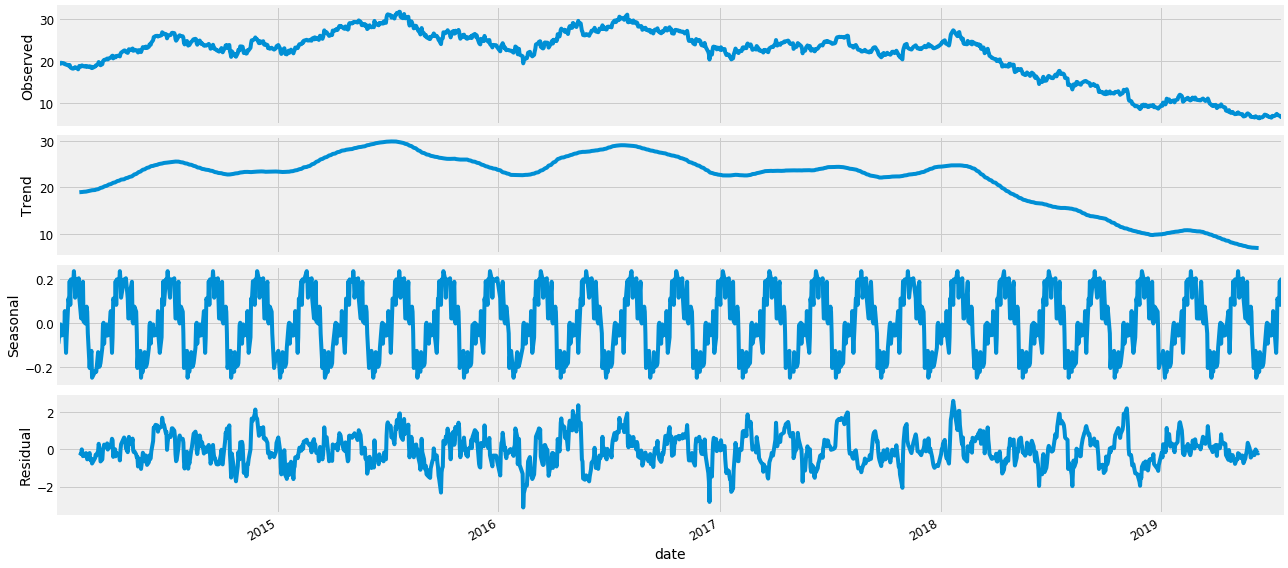

In [116]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq = 52)
fig = decomposition.plot()
plt.show()

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation `ARIMA(p, d, q)`. These three parameters account for seasonality, trend, and noise in data:

In [117]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [118]:
%%time
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12419.226671236955
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10583.576817025954
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:9085.938654311924
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4664.716493728758
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4621.729750571157
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:4591.453974441892
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:5443.268792655464
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4626.86146355251
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:4588.390176508337
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4661.063497993893
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4651.290563816219
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:4617.346461300098
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4624.215446546246
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4623.195812692362
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:4593.07435610937
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:5072.371026596577
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:4625.684044127356
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:4590.291102867336
ARIMA(0, 0

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1619.5383894508038
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1615.6651605054763
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:3148.6629269364785
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:2154.142712360946
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:1711.0019411818066
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1579.7753582028854
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1581.7690792916774
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1581.3412483460088
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1962.5942761955082
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1619.8606655047124
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1617.6668526781345
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:2776.08302061713
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:2015.4332879317328
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:1713.1191353810932
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:2522.5196570945095
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:2512.5065349606643
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:2500.180047494983
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:3465.7455648006

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:1723.1257995409308
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1585.0451235718028
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1583.491968262522
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1603.5615811610778
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:2446.99193900074
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1620.1065094431806
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:1619.2799559354398
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:3863.56067103799
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:2470.9780835853103
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:1711.3340956880143
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1584.6745635731004
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1585.4672115818803
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:1582.1201524245016
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:2073.625627089214
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1622.106879261647
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:1618.5332790918976
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:3077.8854308351342
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:2121.744577526281


ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:2119.2330278021363
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1630.970840795354
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:1625.6723705630347
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:3162.223610269415
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:2174.5679167487024
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:1730.3284123859296
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:1588.1091006006022
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1588.7083443314073
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:1590.1552231872165
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:1972.0192473418024
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:1629.6823266412466
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:1628.501262689126
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:2785.6646538914883
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:2030.1003676804503
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:1733.52647154734
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1592.9278628675727
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1590.1541935105065
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1587.31506848903

ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:2011.9487269326626
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:1716.7879560714543
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:1582.6713250389753
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1580.3605824309323
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1576.62321774469
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:2454.5275679428505
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1616.4002756162145
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1615.265987685882
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:3870.4544870644017
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:2482.16616342233
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:1709.2727117928166
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1580.4372566570642
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1582.3602821876832
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1578.5991135190143
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:2079.745442650097
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1618.4005462484254
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1614.8395496567994
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:3082.212642290109

In [119]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9394      0.010     97.791      0.000       0.921       0.958
ma.L1         -0.9977      0.003   -287.341      0.000      -1.005      -0.991
ar.S.L12      -0.4961      0.021    -24.009      0.000      -0.537      -0.456
sigma2         0.2726      0.009     30.228      0.000       0.255       0.290


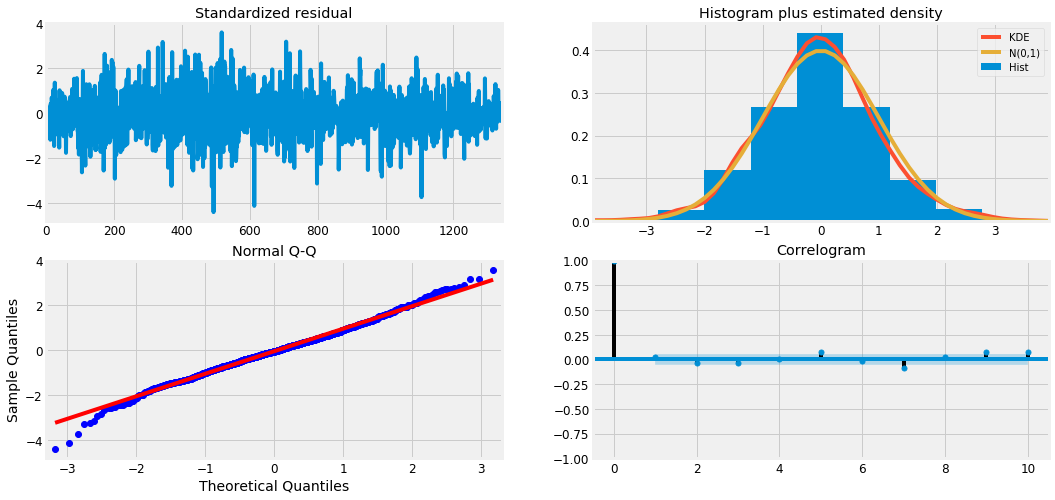

In [120]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [122]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [123]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.74


In [124]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.86


In [125]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x117268730> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range